(sec_guide_accuracy)=
# Improving discriminator accuracy

This page explores the accuracy of the discriminator when modifying various hyperparameters.



## Training replicates

In general, more training replicates will improve the accuracy of
the discriminator. It's often reasonable to train for multiple epochs
(one epoch is a full pass over the training data), although overfitting
is a possibility, particularly with fewer replicates.
Below, we'll train the bottleneck model for 20 epochs while increasing
the number of training replicates.

In [1]:
%%bash
mkdir -p out/accuracy
for reps in 10000 100000 1000000; do
    echo $reps training replicates
    dinf train \
        --seed 1 \
        --epochs 20 \
        --training-replicates $reps \
        --test-replicates 10000 \
        ../../examples/bottleneck/model.py \
        out/accuracy/replicates-${reps}.pkl
    echo
done

10000 training replicates
[epoch 1|10000] train loss 0.2648, accuracy 0.8912; test loss 0.4547, accuracy 0.8448
[epoch 2|10000] train loss 0.1312, accuracy 0.9683; test loss 0.1865, accuracy 0.9331
[epoch 3|10000] train loss 0.0923, accuracy 0.9770; test loss 0.0713, accuracy 0.9805
[epoch 4|10000] train loss 0.0612, accuracy 0.9873; test loss 0.0845, accuracy 0.9696
[epoch 5|10000] train loss 0.0492, accuracy 0.9900; test loss 0.0634, accuracy 0.9816
[epoch 6|10000] train loss 0.0386, accuracy 0.9918; test loss 0.0597, accuracy 0.9823
[epoch 7|10000] train loss 0.0292, accuracy 0.9945; test loss 0.0575, accuracy 0.9826
[epoch 8|10000] train loss 0.0241, accuracy 0.9957; test loss 0.0586, accuracy 0.9809
[epoch 9|10000] train loss 0.0250, accuracy 0.9953; test loss 0.0713, accuracy 0.9752
[epoch 10|10000] train loss 0.0155, accuracy 0.9979; test loss 0.1352, accuracy 0.9563
[epoch 11|10000] train loss 0.0123, accuracy 0.9980; test loss 0.1489, accuracy 0.9515
[epoch 12|10000] train los

In [2]:
# Output SVG when using a notebook.
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("svg")

# Increase default figure size.
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20 / 2.54, 20 / 2.54]

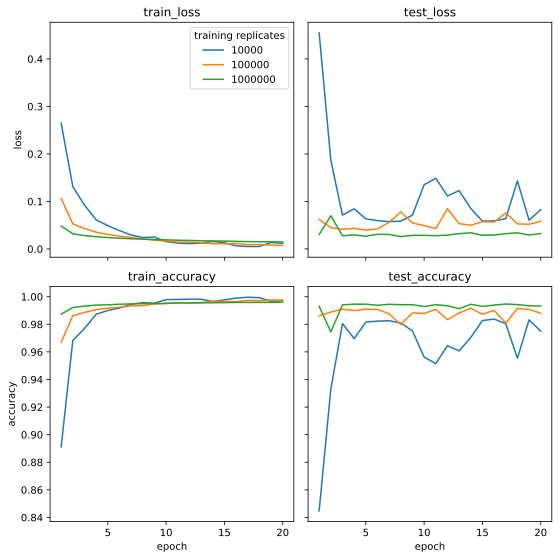

In [4]:
import dinf
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, sharex="all", sharey="row", tight_layout=True)

for reps in (10000, 100000, 1000000):
    discriminator = dinf.Discriminator.from_file(f"out/accuracy/replicates-{reps}.pkl")
    for ax, metric in zip(
        axs.flat, ("train_loss", "test_loss", "train_accuracy", "test_accuracy")
    ):
        y = discriminator.train_metrics[metric]
        epoch = range(1, len(y) + 1)
        ax.plot(epoch, y, label=str(reps))
        ax.set_title(metric)

axs[0, 0].legend(title="training replicates")
axs[0, 0].set_ylabel("loss")
axs[1, 0].set_ylabel("accuracy")
axs[1, 0].set_xlabel("epoch")
axs[1, 1].set_xlabel("epoch")
plt.show(fig)

From this, we see overfitting with 10,000 replicates after just
a few epochs (indicated by an increasing test loss).
For 100,000 replicates, the test loss has at best plateaued,
and is at worst overfitting.
But for 1,000,000 replicates, the training has not overfit after
20 epochs, although the test loss and accuracy may have plateaued.

With fewer training replicates, the network can memorise the
training dataset (leading to overfit). By default, Dinf uses
a network with ~30,000 parameters. With more training data it's
harder for the network to memorise the data,
but the threshold at which this happens will vary depending on
the network architecture and capacity.

## Information content of features

- Bigger feature arrays hold more information.
- Does the feature matrix constitute a sufficient statistic
  for the parameter(s) in question?

In [1]:
%%bash

mkdir -p out/accuracy
for nind in 16 32 64 96 128; do
    echo $nind individuals in the feature matrix
    sed "s/num_individuals = [0-9]\+/num_individuals = $nind/" \
        ../../examples/bottleneck/model.py \
        > /tmp/model.py
    dinf train \
        --seed 1 \
        --epochs 20 \
        --training-replicates 10000 \
        --test-replicates 10000 \
        /tmp/model.py \
        out/accuracy/num_individuals-${nind}.pkl
    echo
done

16 individuals in the feature matrix
[epoch 1|10000] train loss 0.2648, accuracy 0.8912; test loss 0.4547, accuracy 0.8448
[epoch 2|10000] train loss 0.1312, accuracy 0.9683; test loss 0.1865, accuracy 0.9331
[epoch 3|10000] train loss 0.0923, accuracy 0.9770; test loss 0.0713, accuracy 0.9805
[epoch 4|10000] train loss 0.0612, accuracy 0.9873; test loss 0.0845, accuracy 0.9696
[epoch 5|10000] train loss 0.0492, accuracy 0.9900; test loss 0.0634, accuracy 0.9816
[epoch 6|10000] train loss 0.0386, accuracy 0.9918; test loss 0.0597, accuracy 0.9823
[epoch 7|10000] train loss 0.0292, accuracy 0.9945; test loss 0.0575, accuracy 0.9826
[epoch 8|10000] train loss 0.0241, accuracy 0.9957; test loss 0.0587, accuracy 0.9809
[epoch 9|10000] train loss 0.0250, accuracy 0.9953; test loss 0.0713, accuracy 0.9751
[epoch 10|10000] train loss 0.0155, accuracy 0.9979; test loss 0.1352, accuracy 0.9563
[epoch 11|10000] train loss 0.0123, accuracy 0.9980; test loss 0.1489, accuracy 0.9514
[epoch 12|10000

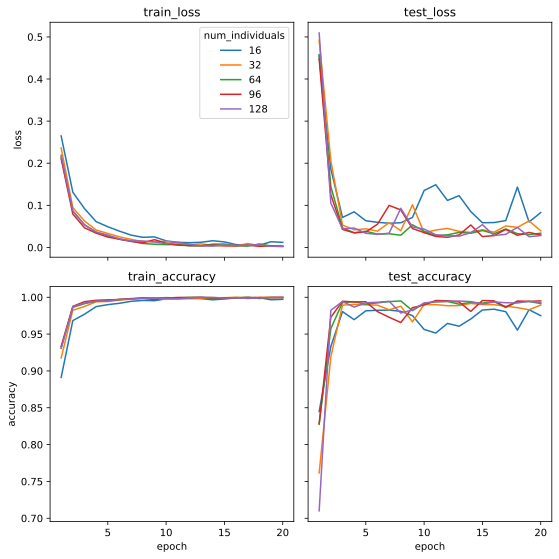

In [5]:
import dinf
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, sharex="all", sharey="row", tight_layout=True)

for nind in (16, 32, 64, 96, 128):
    discriminator = dinf.Discriminator.from_file(
        f"out/accuracy/num_individuals-{nind}.pkl"
    )
    for ax, metric in zip(
        axs.flat, ("train_loss", "test_loss", "train_accuracy", "test_accuracy")
    ):
        y = discriminator.train_metrics[metric]
        epoch = range(1, len(y) + 1)
        ax.plot(epoch, y, label=str(nind))
        ax.set_title(metric)

axs[0, 0].legend(title="num_individuals")
axs[0, 0].set_ylabel("loss")
axs[1, 0].set_ylabel("accuracy")
axs[1, 0].set_xlabel("epoch")
axs[1, 1].set_xlabel("epoch")
plt.show(fig)

The results above suggest that the number of individuals has
very little effect on the accuracy of the discriminator.
This shouldn't be a big surprise, as Dinf uses an
exchangeable neural network that summarises information across
individuals using (by default) the variance function.

The bottleneck model uses feature matrices with `maf_thresh=0.05`,
which excludes low frequency alleles. In empirical datasets,
genotyping errors can produce false positive detection of rare
alleles, which is mitigated by MAF filtering.
With no MAF filter (and high-quality data) there may be a more
pronounced increase in available information as the number
of individuals is increased.

In [1]:
%%bash

mkdir -p out/accuracy
for seqlen in 50000 500000 5000000; do
    for nloci in 16 32 64 96 128; do
        echo num_loci=$nloci sequence_length=$seqlen
        sed -e "s/num_loci=[0-9]\+/num_loci=$nloci/" \
            -e "s/sequence_length = [_0-9]/sequence_length = $seqlen/" \
            ../../examples/bottleneck/model.py \
            > /tmp/model.py
        dinf train \
            --seed 1 \
            --epochs 20 \
            --training-replicates 10000 \
            --test-replicates 10000 \
            /tmp/model.py \
            out/accuracy/num_loci-${nloci}_sequence_length-${seqlen}.pkl
        echo
    done
done

num_loci=16 sequence_length=50000
[epoch 1|10000] train loss 0.4598, accuracy 0.7529; test loss 0.6227, accuracy 0.6169
[epoch 2|10000] train loss 0.4080, accuracy 0.8019; test loss 0.4735, accuracy 0.7639
[epoch 3|10000] train loss 0.3758, accuracy 0.8242; test loss 0.4023, accuracy 0.8136
[epoch 4|10000] train loss 0.3430, accuracy 0.8523; test loss 0.3919, accuracy 0.8349
[epoch 5|10000] train loss 0.3096, accuracy 0.8725; test loss 0.3945, accuracy 0.8326
[epoch 6|10000] train loss 0.2818, accuracy 0.8827; test loss 0.4213, accuracy 0.8205
[epoch 7|10000] train loss 0.2573, accuracy 0.8959; test loss 0.4017, accuracy 0.8341
[epoch 8|10000] train loss 0.2370, accuracy 0.9049; test loss 0.4006, accuracy 0.8373
[epoch 9|10000] train loss 0.2260, accuracy 0.9083; test loss 0.4015, accuracy 0.8351
[epoch 10|10000] train loss 0.2007, accuracy 0.9211; test loss 0.4281, accuracy 0.8395
[epoch 11|10000] train loss 0.1856, accuracy 0.9283; test loss 0.4410, accuracy 0.8403
[epoch 12|10000] t

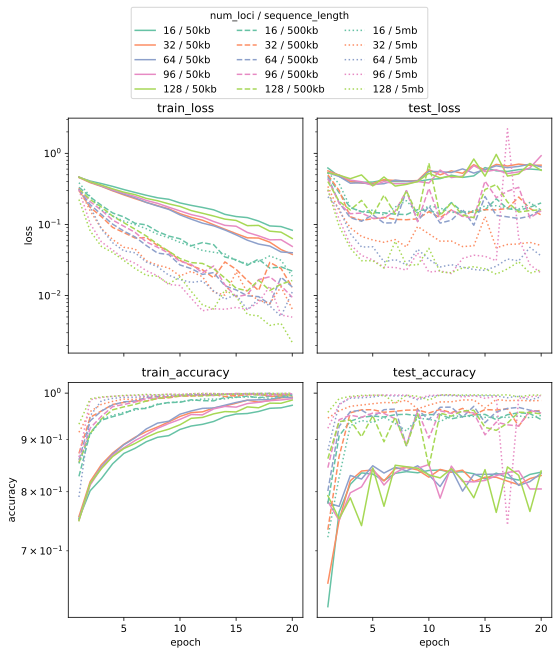

In [3]:
import dinf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

fig, axs = plt.subplots(
    nrows=2,
    ncols=2,
    sharex="all",
    sharey="row",
    tight_layout=True,
    subplot_kw=dict(yscale="log"),
)
cmap = matplotlib.cm.get_cmap("Set2")
cycle = cycler(linestyle=["-", "--", ":"]) * cycler(color=[cmap(i) for i in range(5)])
for ax in axs.flat:
    ax.set_prop_cycle(cycle)

for seqlen, seqlenlabel in zip((50000, 500000, 5000000), ("50kb", "500kb", "5mb")):
    for nloci in (16, 32, 64, 96, 128):
        discriminator = dinf.Discriminator.from_file(
            f"out/accuracy/num_loci-{nloci}_sequence_length-{seqlen}.pkl"
        )
        for ax, metric in zip(
            axs.flat, ("train_loss", "test_loss", "train_accuracy", "test_accuracy")
        ):
            y = discriminator.train_metrics[metric]
            epoch = range(1, len(y) + 1)
            ax.plot(epoch, y, label=f"{nloci} / {seqlenlabel}")
            ax.set_title(metric)

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title="num_loci / sequence_length",
    bbox_to_anchor=(0.5, 1.15),
    loc="upper center",
    borderaxespad=0.0,
    ncol=3,
)
axs[0, 0].set_ylabel("loss")
axs[1, 0].set_ylabel("accuracy")
axs[1, 0].set_xlabel("epoch")
axs[1, 1].set_xlabel("epoch")
plt.show(fig)

## Discriminator network capacity

Assuming the features contain sufficient information,
the discriminator network needs to be able to extract this.
The capacity of the network can be increased by increasing
the number of trainable neural network parameters
- Deeper network
- More filters in convolution layers
- More neurons in fully connected (dense) layers

Increased network capacity comes at a cost.
- Need to train for longer (more training replicates! more epochs?).
- Can overfit more easily.